### Importing libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt   

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score


import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.utils import to_categorical

### Loading the dataset

In [2]:
wine_data = datasets.load_wine()

In [3]:
print(wine_data['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

### To dataframe

In [4]:
data = pd.DataFrame(data = wine_data['data'], columns = wine_data['feature_names'])

data['target'] = wine_data['target']

data.sample(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
74,11.96,1.09,2.30,21.0,101.0,3.38,2.14,0.13,1.65,3.21,0.99,3.13,886.0,1
22,13.71,1.86,2.36,16.6,101.0,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035.0,0
149,13.08,3.90,2.36,21.5,113.0,1.41,1.39,0.34,1.14,9.40,0.57,1.33,550.0,2
78,12.33,0.99,1.95,14.8,136.0,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750.0,1
123,13.05,5.80,2.13,21.5,86.0,2.62,2.65,0.30,2.01,2.60,0.73,3.10,380.0,1


In [5]:
data.shape

(178, 14)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [7]:
data.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [8]:
data['target'].value_counts()

1    71
0    59
2    48
Name: target, dtype: int64

### Visualisation

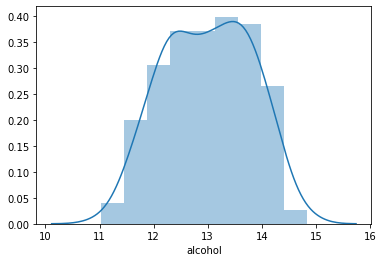

In [9]:
sns.distplot(data['alcohol'],kde=1)

Alcohol content in each class 

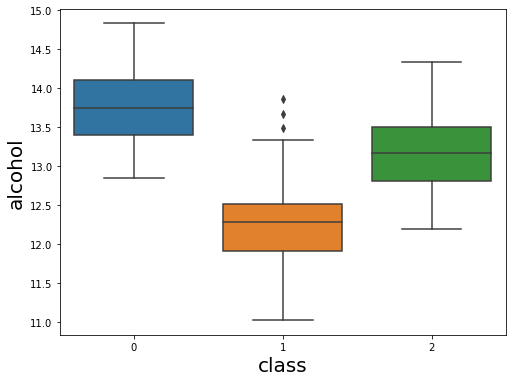

In [10]:
plt.figure(figsize=(8, 6))

sns.boxplot('target', 'alcohol', data = data)

plt.xlabel('class', fontsize = 20)
plt.ylabel('alcohol', fontsize = 20)

plt.show()

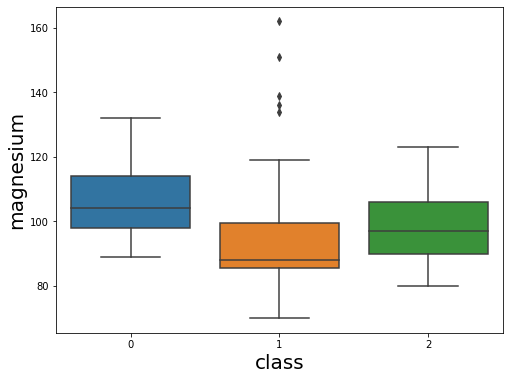

In [11]:
plt.figure(figsize=(8, 6))

sns.boxplot('target', 'magnesium', data = data)

plt.xlabel('class', fontsize = 20)
plt.ylabel('magnesium', fontsize = 20)

plt.show()

### Splitting the data

In [12]:
features = data.drop('target', axis=1)

target = data[['target']]

In [13]:
features.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'],
      dtype='object')

In [14]:
target.sample(5)

,target
168,2
139,2
31,0
43,0
142,2


In [15]:
target = to_categorical(target, 3)

target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
standardScaler = StandardScaler()

processed_features = pd.DataFrame(standardScaler.fit_transform(features), 
                                columns=features.columns,
                                index=features.index)

processed_features.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,7.841418e-15,1.002821,-2.434235,-0.788245,0.061000,0.836129,2.259772
malic_acid,178.0,2.444986e-16,1.002821,-1.432983,-0.658749,-0.423112,0.669793,3.109192
ash,178.0,-4.059175e-15,1.002821,-3.679162,-0.572122,-0.023821,0.698109,3.156325
alcalinity_of_ash,178.0,-7.110417e-17,1.002821,-2.671018,-0.689137,0.001518,0.602088,3.154511
magnesium,178.0,-2.494883e-17,1.002821,-2.088255,-0.824415,-0.122282,0.509638,4.371372
total_phenols,178.0,-1.955365e-16,1.002821,-2.107246,-0.885468,0.095960,0.808997,2.539515
flavanoids,178.0,9.443133e-16,1.002821,-1.695971,-0.827539,0.106150,0.849085,3.062832
nonflavanoid_phenols,178.0,-4.178929e-16,1.002821,-1.868234,-0.740141,-0.176095,0.609541,2.402403
proanthocyanins,178.0,-1.540590e-15,1.002821,-2.069034,-0.597284,-0.062898,0.629175,3.485073
color_intensity,178.0,-4.129032e-16,1.002821,-1.634288,-0.795103,-0.159225,0.493956,3.435432


### Splitting dataset

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(processed_features, 
                                                    target, 
                                                    test_size = 0.2, 
                                                    random_state=1)

In [18]:
x_train.shape, y_train.shape

((142, 13), (142, 3))

In [19]:
x_test.shape, y_test.shape

((36, 13), (36, 3))

### Building the model

In [20]:
class WineClassificationModel(Model):
    
    def __init__(self, input_shape):
        
        super(WineClassificationModel, self).__init__()

        self.d1 = layers.Dense(128, activation = 'relu', input_shape = [input_shape])
        self.d2 = layers.Dense(64, activation = 'relu')
        
        self.d3 = layers.Dense(3, activation = 'softmax')

    def call(self, x):
        
        x = self.d1(x)
        x = self.d2(x)

        x = self.d3(x)
        
        return x

In [21]:
model = WineClassificationModel(x_train.shape[1])

model.compile(optimizer = keras.optimizers.SGD(lr = 0.001),
             loss = tf.keras.losses.CategoricalCrossentropy(),
             metrics = ['accuracy'])

In [28]:
num_epochs = 100

In [25]:
training_history = model.fit(x_train.values, 
                             y_train, 
                             validation_split = 0.2, 
                             epochs = num_epochs,
                             batch_size = 48)

Train on 113 samples, validate on 29 samples
Epoch 1/100
113/113 [==============================] - 0s 576us/sample - loss: 0.7620 - accuracy: 0.7965 - val_loss: 0.9163 - val_accuracy: 0.6207
Epoch 2/100
113/113 [==============================] - 0s 323us/sample - loss: 0.7585 - accuracy: 0.7965 - val_loss: 0.9129 - val_accuracy: 0.6207
Epoch 3/100
113/113 [==============================] - 0s 233us/sample - loss: 0.7550 - accuracy: 0.8142 - val_loss: 0.9093 - val_accuracy: 0.6207
Epoch 4/100
113/113 [==============================] - 0s 323us/sample - loss: 0.7516 - accuracy: 0.8230 - val_loss: 0.9053 - val_accuracy: 0.6207
Epoch 5/100
113/113 [==============================] - 0s 186us/sample - loss: 0.7480 - accuracy: 0.8230 - val_loss: 0.9018 - val_accuracy: 0.6207
Epoch 6/100
113/113 [==============================] - 0s 228us/sample - loss: 0.7447 - accuracy: 0.8319 - val_loss: 0.8983 - val_accuracy: 0.6207
Epoch 7/100
113/113 [==============================] - 0s 159us/sample - 

113/113 [==============================] - 0s 237us/sample - loss: 0.5998 - accuracy: 0.9292 - val_loss: 0.7488 - val_accuracy: 0.7241
Epoch 57/100
113/113 [==============================] - 0s 201us/sample - loss: 0.5974 - accuracy: 0.9292 - val_loss: 0.7464 - val_accuracy: 0.7241
Epoch 58/100
113/113 [==============================] - 0s 202us/sample - loss: 0.5949 - accuracy: 0.9292 - val_loss: 0.7436 - val_accuracy: 0.7586
Epoch 59/100
113/113 [==============================] - 0s 216us/sample - loss: 0.5924 - accuracy: 0.9292 - val_loss: 0.7415 - val_accuracy: 0.7586
Epoch 60/100
113/113 [==============================] - 0s 248us/sample - loss: 0.5900 - accuracy: 0.9292 - val_loss: 0.7392 - val_accuracy: 0.7586
Epoch 61/100
113/113 [==============================] - 0s 201us/sample - loss: 0.5876 - accuracy: 0.9292 - val_loss: 0.7369 - val_accuracy: 0.7586
Epoch 62/100
113/113 [==============================] - 0s 165us/sample - loss: 0.5853 - accuracy: 0.9292 - val_loss: 0.7346 

In [26]:
training_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

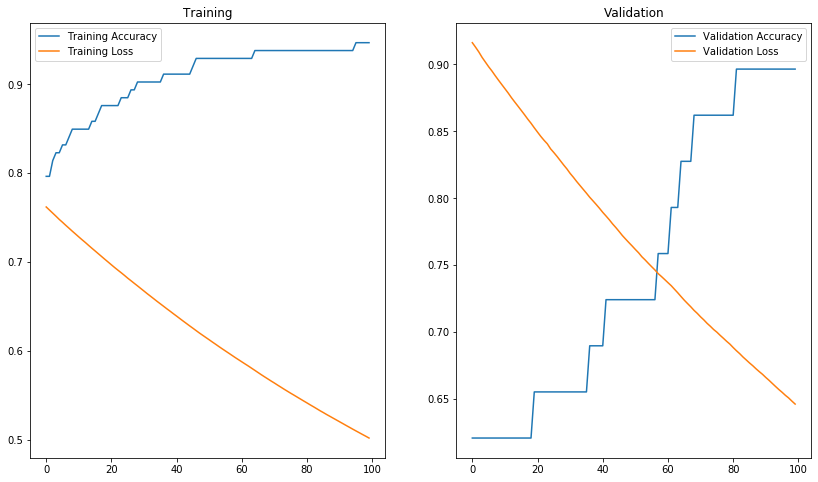

In [29]:
train_acc = training_history.history['accuracy']
train_loss = training_history.history['loss']

precision = training_history.history['val_accuracy']
recall = training_history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(14, 8))

plt.subplot(1, 2, 1)

plt.plot(epochs_range, train_acc, label='Training Accuracy')
plt.plot(epochs_range, train_loss, label='Training Loss')

plt.title('Training')
plt.legend()

plt.subplot(1, 2, 2)

plt.plot(epochs_range, precision, label='Validation Accuracy')
plt.plot(epochs_range, recall, label='Validation Loss')

plt.title('Validation')
plt.legend()

### Model evaluation

In [30]:
score = model.evaluate(x_test, y_test)

score_df = pd.Series(score, index = model.metrics_names)

score_df

36/36 [==============================] - 0s 181us/sample - loss: 0.5252 - accuracy: 0.9722


loss        0.525194
accuracy    0.972222
dtype: float64

### Predicting the model

In [31]:
y_pred = model.predict(x_test)

y_pred[:10]

array([[0.19096762, 0.23577446, 0.5732579 ],
       [0.21332249, 0.6575939 , 0.12908357],
       [0.54898167, 0.28316942, 0.16784886],
       [0.3191119 , 0.5792227 , 0.10166539],
       [0.70750856, 0.12881096, 0.16368043],
       [0.18227057, 0.23533075, 0.5823987 ],
       [0.21861762, 0.6332382 , 0.14814422],
       [0.82993734, 0.09114079, 0.07892194],
       [0.16305587, 0.3838157 , 0.45312837],
       [0.22258751, 0.54073745, 0.23667498]], dtype=float32)

In [32]:
y_pred = np.where(y_pred>=0.5, 1, y_pred)

y_pred = np.where(y_pred<0.5, 0, y_pred)

In [33]:
y_pred[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.]], dtype=float32)

In [34]:
y_test[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], dtype=float32)

Score

In [35]:
accuracy_score(y_test, y_pred)

0.8611111111111112